In [68]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [69]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x', 'y'])

In [70]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x', 'y'])

In [71]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x', 'y'])

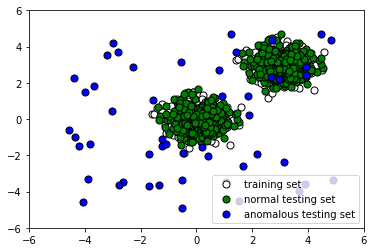

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c='white',
                 s=50, edgecolor='black')
p2 = plt.scatter(X_test.x, X_test.y, c='green',
                 s=50, edgecolor='black')
p3 = plt.scatter(X_outliers.x, X_outliers.y, c='blue',
                s=50, edgecolor='black')
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3],
           ["training set",
            "normal testing set", "anomalous testing set"],
           loc="lower right")

plt.show()

In [73]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecate

In [74]:
X_outliers = X_outliers.assign(pred = y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


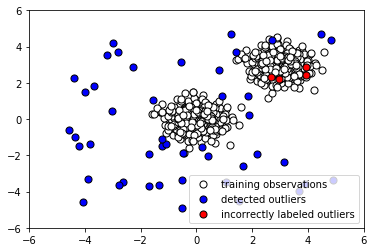

In [75]:
p1 = plt.scatter(X_train.x, X_train.y, c='white',
                 s=50, edgecolor='black')
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], 
                 X_outliers.loc[X_outliers.pred == -1, ['y']], 
                 c='blue', s=50, edgecolor='black')
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], 
                 X_outliers.loc[X_outliers.pred == 1, ['y']], 
                 c='red', s=50, edgecolor='black')

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "incorrectly labeled outliers"],
           loc="lower right")

plt.show()

In [76]:
X_test = X_test.assign(pred = y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


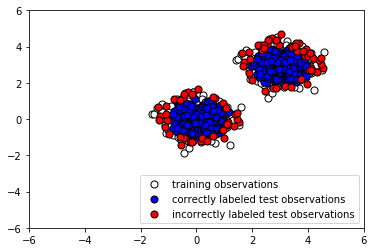

In [78]:
p1 = plt.scatter(X_train.x, X_train.y, c='white',
                 s=50, edgecolor='black')
p2 = plt.scatter(X_test.loc[X_test.pred == 1, ['x']], 
                 X_test.loc[X_test.pred == 1, ['y']], 
                 c='blue', s=50, edgecolor='black')
p3 = plt.scatter(X_test.loc[X_test.pred == -1, ['x']], 
                 X_test.loc[X_test.pred == -1, ['y']], 
                 c='red', s=50, edgecolor='black')

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3],
           ["training observations",
            "correctly labeled test observations", 
            "incorrectly labeled test observations"],
           loc="lower right")

plt.show()